# **Skin Cancer Detector**

O projeto conta com a criação de uma rede neural capaz de realizar o aprendizado de máquina e reconhecimento de padrões para identificar e classificar uma imagem de lesão de pele baseado em 7 principais tipos:


*  Nevo melanocítico: Distúrbio geralmente não cancerígeno das células da pele produtoras de pigmento, comumente chamado de marcas de nascença ou pintas.
*   Melanoma: O tipo mais grave de câncer de pele. O melanoma ocorre quando as células produtoras dos pigmentos que dão cor à pele tornam-se cancerígenas.
*   Verruga seborreica: Condição de pele benigna com aspecto de um nódulo maleável de cor castanha, preta ou marrom. A ceratose seborreica é um dos tumores de pele benignos mais comuns em idosos. Embora existam casos de tumores individuais, a presença de vários tumores é mais comum.
*   Carcinoma basocelular: Tipo de câncer de pele que começa nas células basais. As células basais produzem novas células da pele conforme as antigas morrem. Limitar a exposição ao sol pode ajudar a evitar que essas células se tornem cancerígenas. Esse tipo de câncer geralmente aparece como um nódulo de cera branco ou uma mancha escamosa marrom em áreas expostas ao sol, como rosto e pescoço.
*   Ceratose actínica: Mancha escamosa áspera na pele causada por anos de exposição ao sol. A ceratose actínica geralmente afeta idosos. Reduzir a exposição ao sol pode ajudar a diminuir o risco. É mais comum no rosto, nos lábios, nas orelhas, no dorso das mãos, nos antebraços, no couro cabeludo e no pescoço. A pele escamosa e áspera aumenta lentamente e não costuma causar outros sinais ou sintomas. A lesão pode levar anos para se desenvolver.
*   Lesões vasculares: As anomalias vasculares correspondem a um extenso espectro de alterações que se dividem em dois grupos principais: 1) tumores vasculares, que representam as lesões proliferativas e 2) malformações vasculares, originadas por ectasias nos vasos, sejam elas capilares, venosas ou linfáticas.
*   Dermatofibroma: lesões benignas típicas de extremidades, como braços, antebraços e pernas. Por terem coloração acastanhada, geralmente, são motivos de consulta, na qual os pacientes buscam saber se são pintas ou sinais.


Realizando com precisão a classificação será possível então direcionar o melhor tratamento possível.


Começamos o projeto importanto a base de dados das imagens que estavam alocadas no drive do trabalho.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


Importamos todas as bibliotecas que serão necessárias ao longo do desenvolvimento da nossa rede neural

In [ ]:
import os
import numpy as np
import pandas as pd 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dropout

Abrimos o arquivo que continha a classificação para cada imagem do dataset de treino e dataset de validação.

In [ ]:
metadata = pd.read_csv('/content/drive/My Drive/TEES/Trabalho/HAM10000_metadata')
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [ ]:
metadata_validation = pd.read_csv('/content/drive/My Drive/TEES/Trabalho/metadata_validation.csv')
metadata_validation.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0034321,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0034322,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0034323,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,ISIC_0034324,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0034325,0.0,1.0,0.0,0.0,0.0,0.0,0.0



Agrupamos as imagens do dataset que estava fragmentado em duas pastas por conta do tamanho e quantidade em apenas uma pasta.

In [ ]:
# It's not necessary to run this cell again
old_path1 = '/content/drive/My Drive/TEES/Trabalho/HAM10000_part_2/'
new_path1 = '/content/drive/My Drive/TEES/Trabalho/HAM10000_part_1/'
archives = os.listdir(old_path1)
for i in archives:
  os.replace((old_path1+i), (new_path1+i))

Checando a quantidade de imagens da pasta original e da pasta de destino

In [ ]:
# Number of images in the folders
print(len(os.listdir(old_path1)))
print(len(os.listdir(new_path1))) 

0
10015


Representando de forma gráfica o número de imagens por tipo de lesão contidas no dataset de treino.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Número de imagens')

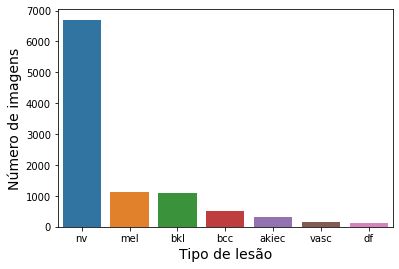

In [ ]:


sns.countplot(metadata['dx'], order = metadata['dx'].value_counts().index)
plt.xlabel("Tipo de lesão", size = 14)
plt.ylabel("Número de imagens", size = 14)

Organizando as imagens em pastas representando suas classes

In [ ]:
# It's not necessary to run this cell again

old_path_2 = '/content/drive/My Drive/TEES/Trabalho/HAM10000_part_1/'
new_path_2 = '/content/drive/My Drive/TEES/Trabalho/dataset/'

for i in range(0, len(metadata)):
  os.replace(old_path_2+metadata.image_id[i]+'.jpg', new_path_2+metadata.dx[i]+"/"+metadata.image_id[i]+'.jpg')

Movendo as imagens para subpastas para duplicá-las

In [ ]:
#Not necessary to run this cell again
old_path_2_1 = '/content/drive/My Drive/TEES/Trabalho/dataset/akiec/'
new_path_2_1 = '/content/drive/My Drive/TEES/Trabalho/dataset/akiec/0/'

for i in os.listdir(old_path_2_1):
  if i == '0':
    pass
  else:
    os.replace(old_path_2_1+i, new_path_2_1+i)

old_path_2_2 = '/content/drive/My Drive/TEES/Trabalho/dataset/bcc/'
new_path_2_2 = '/content/drive/My Drive/TEES/Trabalho/dataset/bcc/1/'

for i in os.listdir(old_path_2_2):
  if i == '1':
    pass
  else:
    os.replace(old_path_2_2+i, new_path_2_2+i)

old_path_2_3 = '/content/drive/My Drive/TEES/Trabalho/dataset/bkl/'
new_path_2_3 = '/content/drive/My Drive/TEES/Trabalho/dataset/bkl/2/'

for i in os.listdir(old_path_2_3):
  if i == '2':
    pass
  else:
    os.replace(old_path_2_3+i, new_path_2_3+i)

old_path_2_4 = '/content/drive/My Drive/TEES/Trabalho/dataset/df/'
new_path_2_4 = '/content/drive/My Drive/TEES/Trabalho/dataset/df/3/'

for i in os.listdir(old_path_2_4):
  if i == '3':
    pass
  else:
    os.replace(old_path_2_4+i, new_path_2_4+i)

old_path_2_5 = '/content/drive/My Drive/TEES/Trabalho/dataset/mel/'
new_path_2_5 = '/content/drive/My Drive/TEES/Trabalho/dataset/mel/4/'

for i in os.listdir(old_path_2_5):
  if i == '4':
    pass
  else:
    os.replace(old_path_2_5+i, new_path_2_5+i)

old_path_2_6 = '/content/drive/My Drive/TEES/Trabalho/dataset/nv/'
new_path_2_6 = '/content/drive/My Drive/TEES/Trabalho/dataset/nv/5/'

for i in os.listdir(old_path_2_6):
  if i == '5':
    pass
  else:
    os.replace(old_path_2_6+i, new_path_2_6+i)

old_path_2_7 = '/content/drive/My Drive/TEES/Trabalho/dataset/vasc/'
new_path_2_7 = '/content/drive/My Drive/TEES/Trabalho/dataset/vasc/6/'

for i in os.listdir(old_path_2_7):
  if i == '6':
    pass
  else:
    os.replace(old_path_2_7+i, new_path_2_7+i)

Duplicando as imagens do dataset de treino

In [ ]:
#Duplicating the dataset images
#Not necessary to run this cell again
directory = '/content/drive/My Drive/TEES/Trabalho/dataset/df/'
datagen = ImageDataGenerator(rescale = 1./255,
                             horizontal_flip = True,
                             vertical_flip = True,
                             zoom_range = 0.3,
                             shear_range = 0.3,
                             rotation_range = 100
                            )

duplicates = datagen.flow_from_directory(directory = directory, 
                                target_size = (255, 255), 
                                save_to_dir = directory+'3/',
                                save_format = 'jpg',
                                # batch_size = len(os.listdir(directory+'6/'))
                                batch_size = 900
                                )
duplicates.next()

Found 5680 images belonging to 1 classes.


Movendo as imagens de volta para a pasta original de classe

In [ ]:
#Not necessary to run this cell again
for i in os.listdir(directory+'3/'):
  os.replace(directory+'3/'+i, directory+i)

Reduzindo o número de imagens para cada classe

In [ ]:
#Not necessary to run this cell again
dir_orig = '/content/drive/My Drive/TEES/Trabalho/dataset/vasc/'
dir_dest = '/content/drive/My Drive/TEES/Trabalho/dataset_nao_utilizado/vasc/'

i = 0
for img in os.listdir(dir_orig):
  if i%4 == 0:
    pass
  else:
    os.replace(dir_orig+img, dir_dest+img)
  i += 1

Representação gráfica do número de imagens após o balanceamento.

Text(0, 0.5, 'Número de imagens')

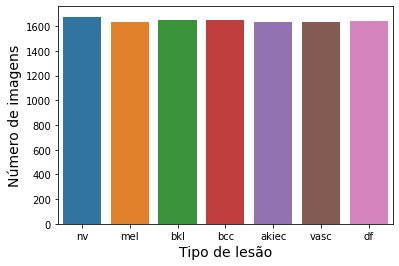

In [ ]:
new_path_x = '/content/drive/My Drive/TEES/Trabalho/dataset/'
akiec = len(os.listdir(new_path_x+'akiec'))
bcc = (len(os.listdir(new_path_x+'bcc')))
bkl = (len(os.listdir(new_path_x+'bkl')))
df = (len(os.listdir(new_path_x+'df')))
mel = (len(os.listdir(new_path_x+'mel')))
nv = (len(os.listdir(new_path_x+'nv')))
vasc = (len(os.listdir(new_path_x+'vasc')))
array = [nv, mel, bkl, bcc, akiec, vasc, df]
labels = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

sns.barplot(x = labels,y = array)
plt.xlabel("Tipo de lesão", size = 14)
plt.ylabel("Número de imagens", size = 14)

Agora organizando o dataset de validação

In [ ]:
#It's not necessary to run this cell again
path3 = '/content/drive/My Drive/TEES/Trabalho/dataset_validation/'

for i in range(0, len(metadata_validation)):
  if metadata_validation.MEL[i] == 1.0:
    if os.path.isdir(path3+metadata_validation.image[i]+'.jpg'):
      os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'mel/'+metadata_validation.image[i]+'.jpg')
    else:
      pass
  elif metadata_validation.NV[i] == 1.0:
    if os.path.isdir(path3+metadata_validation.image[i]+'.jpg'):
      os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'nv/'+metadata_validation.image[i]+'.jpg')
    else:
      pass
  elif metadata_validation.BCC[i] == 1.0:
    if os.path.isdir(path3+metadata_validation.image[i]+'.jpg'):
      os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'bcc/'+metadata_validation.image[i]+'.jpg')
    else:
      pass
  elif metadata_validation.AKIEC[i] == 1.0:
    if os.path.isdir(path3+metadata_validation.image[i]+'.jpg'):
      os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'akiec/'+metadata_validation.image[i]+'.jpg')
    else:
      pass
  elif metadata_validation.BKL[i] == 1.0:
    if os.path.isdir(path3+metadata_validation.image[i]+'.jpg'):
      os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'bkl/'+metadata_validation.image[i]+'.jpg')
    else:
      pass
  elif metadata_validation.DF[i] == 1.0:
    if os.path.isdir(path3+metadata_validation.image[i]+'.jpg'):
      os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'df/'+metadata_validation.image[i]+'.jpg')
    else:
      pass
  elif metadata_validation.VASC[i] == 1.0:
    if os.path.isdir(path3+metadata_validation.image[i]+'.jpg'):
      os.replace((path3+metadata_validation.image[i]+'.jpg'), path3+'vasc/'+metadata_validation.image[i]+'.jpg')
    else:
      pass

Movendo as imagens de validação para subpastas para duplicá-las

In [ ]:
old_path_3_1 = '/content/drive/My Drive/TEES/Trabalho/dataset_validation/vasc/'
new_path_3_1 = '/content/drive/My Drive/TEES/Trabalho/dataset_validation/vasc/6/'

for i in os.listdir(old_path_3_1):
  if i == '6':
    pass
  else:
    os.replace(old_path_3_1+i, new_path_3_1+i)


Duplicando as imagens de validação

In [ ]:
#Not necessary to run this cell again
directory = '/content/drive/My Drive/TEES/Trabalho/dataset_validation/vasc/'
datagen = ImageDataGenerator(rescale = 1./255,
                             horizontal_flip = True,
                             vertical_flip = True,
                             zoom_range = 0.2,
                             shear_range = 0.2,
                             rotation_range = 150
                            )

duplicates = datagen.flow_from_directory(directory = directory, 
                                target_size = (255, 255), 
                                save_to_dir = directory+'6/',
                                save_format = 'jpg',
                                # batch_size = len(os.listdir(directory+'6/'))
                                batch_size = 30
                                )
duplicates.next()

Found 96 images belonging to 1 classes.


Movendo as imagens de validação para as pastas originais de classe

In [ ]:
#Not necessary to run this cell again
directory = '/content/drive/My Drive/TEES/Trabalho/dataset_validation/nv/'
for i in os.listdir(directory+'5/'):
  os.replace(directory+'5/'+i, directory+i)

Utilizando o ImageDataGenerator realizamos alteração de tamanho, zoom, direção e distorção do ângulo de algumas imagens do nosso dataset para generalizar as imagens e abranger um número maior de possibilidades de imagens.

In [ ]:

datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             rotation_range = 100)



Definimos o tamanho padrão das imagens e agrupamos, dividimos em grupos e aplicamos a transformação.

In [ ]:
data = datagen.flow_from_directory('/content/drive/My Drive/TEES/Trabalho/dataset/',
                                                 target_size = (255, 255),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

data_val = datagen.flow_from_directory('/content/drive/My Drive/TEES/Trabalho/dataset_validation/',
                                                 target_size = (255, 255),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 11525 images belonging to 7 classes.
Found 921 images belonging to 7 classes.


Text(0.5, 1.0, 'Lesao Vascular')

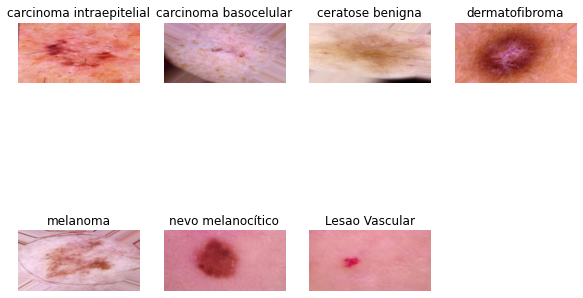

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 7))

rows = 2
columns = 4

Image1 = Image.open('/content/drive/My Drive/TEES/Trabalho/dataset/akiec/_308_9916614.jpg').resize((150,75))
Image2 = Image.open('/content/drive/My Drive/TEES/Trabalho/dataset/bcc/_3_9929938.jpg').resize((150,75))
Image3 = Image.open('/content/drive/My Drive/TEES/Trabalho/dataset/bkl/_6_1275532.jpg').resize((150,75))
Image4 = Image.open('/content/drive/My Drive/TEES/Trabalho/dataset/df/_0_4702873.jpg').resize((150,75))
Image5 = Image.open('/content/drive/My Drive/TEES/Trabalho/dataset/mel/_15_5752787.jpg').resize((150,75))
Image6 = Image.open('/content/drive/My Drive/TEES/Trabalho/dataset/nv/ISIC_0024341.jpg').resize((150,75))
Image7 = Image.open('/content/drive/My Drive/TEES/Trabalho/dataset/vasc/_1_3005840.jpg').resize((150,75))

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title("carcinoma intraepitelial")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("carcinoma basocelular")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("ceratose benigna")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("dermatofibroma")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("melanoma")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("nevo melanocítico")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(Image7)
plt.axis('off')
plt.title("Lesao Vascular")


Definimos a rede neural com duas camadas de convolução com ativação relu e duas camadas de MaxPooling, planificamos os dados e adicionamos uma camada Dense com ativação relu e outra camada Dense com ativação Sigmoid que será a saida da rede.

A escolha da saida em sigmoid se deve ao fato de sua saída ser sempre em porcentagem, variando de 0 a 1.

In [ ]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[255, 255, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=7, activation='sigmoid'))


Compilamos a rede neural, definindo o ativador, a função de perda e a métrica a ser avaliada



In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Treinamento do modelo

In [ ]:
cnn.fit(x = data, validation_data = data_val, epochs = 25)

Epoch 1/25
361/361 [==============================] - 240s 662ms/step - loss: 0.4028 - accuracy: 0.3107 - val_loss: 0.2869 - val_accuracy: 0.5364
Epoch 2/25
361/361 [==============================] - 235s 651ms/step - loss: 0.3385 - accuracy: 0.4043 - val_loss: 0.2955 - val_accuracy: 0.4767
Epoch 3/25
361/361 [==============================] - 237s 656ms/step - loss: 0.3220 - accuracy: 0.4432 - val_loss: 0.2615 - val_accuracy: 0.5961
Epoch 4/25
361/361 [==============================] - 233s 647ms/step - loss: 0.3144 - accuracy: 0.4574 - val_loss: 0.2728 - val_accuracy: 0.5505
Epoch 5/25
361/361 [==============================] - 229s 635ms/step - loss: 0.3125 - accuracy: 0.4580 - val_loss: 0.2811 - val_accuracy: 0.4647
Epoch 6/25
361/361 [==============================] - 229s 635ms/step - loss: 0.3030 - accuracy: 0.4830 - val_loss: 0.3022 - val_accuracy: 0.4267
Epoch 7/25
361/361 [==============================] - 232s 643ms/step - loss: 0.2984 - accuracy: 0.4973 - val_loss: 0.2636 -

In [ ]:

num_of_test_samples = 921
batch_size = 32

Y_pred = cnn.predict(data_val, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(data_val.classes, y_pred))
print('Classification Report')
target_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
print(classification_report(data_val.classes, y_pred, target_names=target_names))

Confusion Matrix
[[11 16 29 24 14 19 15]
 [ 8 15 27 25 17 12 16]
 [11 16 28 23 17  9 24]
 [12 14 29 26 13 16 18]
 [15 19 39 33 18 21 23]
 [ 9 20 28 29 18 12  7]
 [11 12 27 28  8 19 21]]
Classification Report
              precision    recall  f1-score   support

       akiec       0.14      0.09      0.11       128
         bcc       0.13      0.12      0.13       120
         bkl       0.14      0.22      0.17       128
          df       0.14      0.20      0.16       128
         mel       0.17      0.11      0.13       168
          nv       0.11      0.10      0.10       123
        vasc       0.17      0.17      0.17       126

    accuracy                           0.14       921
   macro avg       0.14      0.14      0.14       921
weighted avg       0.14      0.14      0.14       921



In [ ]:
len(data)

361


Predição de uma imagem, baseado no modelo desenvolvido.

In [ ]:
test_image = image.load_img(dir+i, target_size = (255, 255))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
data_val.class_indices

if result[0][0] == 1:
  print('Actinic keratoses and intraepithelial carcinoma(sun burn - Benign)')
elif result[0][1] == 1:
  print('Basal Cell Carcinoma (Malign)')
elif result[0][2] == 1:
  print('Benign Keratosis-like Lesions (Benign)')
elif result[0][3] == 1:
  print('Dermatofibroma (Benign)')
elif result[0][4] == 1:
  print('Melanoma (Malign)')
elif result[0][5] == 1:
  print('Melanocytic Nevi (Benign)')
elif result[0][6] == 1:
  print('Vascular Lesions (Benign)')